# Funksjoner

Vi starter så godt som hver oppgave med å laste ned et datasett fra GitHub-mappen til Ekte Data. Hva om vi hadde en funksjon som gjorde dette for oss, så vi slapp å bruke np.genfromtxt, sortere dataene inn i tid og dataverdier, og sette fyll-verdier til NaN gang på gang? Dette lager vi i denne oppgaven.

Å lage funksjoner er veldig praktisk når man har en operasjon man har bruk for ofte. Det er lurt å lage funsjonene sine generelle og ikke for omfattende - hvis de blir for spesifikke vil de bare fungere i helt spesielle tilfeller, og man får bruk for dem sjelden. 

In [18]:
import numpy as np # for regneoperasjoner
import matplotlib.pyplot as plt # for figurer
import matplotlib
import requests # for filinnlasting
import io # for filinnlasting

### Funksjon #1

Denne funksjonen skal kun lese inn et datasett fra githubmappen til Ekte Data og gi to output: tidsvektoren og selve dataene. 

Fra tidligere vet vi at de månedlige og de årlige datasettene må leses inn litt forskjellig: i det årlige trenger vi litt ekstra info om datasettet, nemlig at kolonnene for tid og variabel-veridene deles av komma, og at det er en linje med header øverst. Vi vet hva slags datasett vi skal laste inn, så det kan vi oppgi til funksjonen ved å sette `filetype='Y'` eller `filetype='M'`. Funksjonen starter derfor med en if-løkke som sjekker `filetype`: er det `'Y'` inkluderer den `delimeter` og `skip_header`, hvis `filetype` er `'M'` utelukker den `delimeter` og `skip_header`. 

- `https://raw.githubusercontent.com/irendundas/EkteData/main/` er *stien* til filen vi laster inn. `file`, f.eks `TempBergenYearly.txt` er selve filen. 
- `dtype=float` betyr at vi laster inn verdiene/innholdet i filen som "float numbers", altså tall med desimaler. 
- `delimeter=','` må inkluderes fordi verdiene i txt-filen er separert med komma. Noen ganger er det bare mellomrom, eller tab. dette må spesifiseres. Er du usikker kan du stort sett bare åpne filen i notepad el.l. og sjekke hva verdiene i filen din er separert med. 

In [19]:
def loadData(file,filetype):
    
    '''
    Denne funksjonen skal
    - Lese inn et datasett fra github mappen til Ekte Data.
    - Returnere en tidsvektor og en matrise med selve verdiene.

    Input 
    file     : Navnet på .txt-filen (ikke inkluder stien her, kun filnavnet)
    filetype : 'M' hvis datasettet har månedlig oppløsning og 'Y' hvis det har 
    årlig oppløsning.
    
    Output
    data      : En vektor eller matrise (avhengig av om datasettet som leses inn
    er årlig eller månedlige gjennomsnitt) med alle verdiene i datasettet
    tid     : Tidsvektoren til datasettet.
    
    '''
    
    # Last ned filen du vil bruke fra Ekte Data sin GitHub
    url = 'https://raw.githubusercontent.com/irendundas/EkteData/main/'+file
    req = requests.get(url)
    f = io.StringIO(req.text)

    
    # Konverter dataene til et leselig format med np.genfromtxt som vi har brukt før
    if filetype == 'Y':
        f.seek(0) # set cursor to the top
        data = np.genfromtxt(f, dtype=float, delimiter=',',skip_header=1)
    
    elif filetype == 'M':
        f.seek(0) # set cursor to the top
        data=np.genfromtxt(f,dtype=float)
        
        
    # Sett alle "fyll-verdier" til NaN
    data[data==-999.99]=np.nan     
    
    # Tidsvektor med desimaler
    tid=data[:,0]
    
    # Selve dataene
    data=data[:,1:]
    
    return data, tid
    
    

Nå kan vi bruke funksjonen vår:

In [20]:
data,tid = loadData(file='TempBergenYearly.txt',filetype='Y')

In [21]:
data

array([[       nan],
       [7.71666667],
       [7.75833333],
       [6.86666667],
       [7.225     ],
       [7.41666667],
       [6.55      ],
       [7.975     ],
       [6.45      ],
       [6.575     ],
       [       nan],
       [       nan],
       [7.83333333],
       [7.175     ],
       [7.01666667],
       [6.78333333],
       [6.55      ],
       [       nan],
       [6.69166667],
       [7.53333333],
       [6.36666667],
       [7.9       ],
       [7.6       ],
       [8.20833333],
       [6.70833333],
       [6.83333333],
       [6.99166667],
       [6.55      ],
       [7.925     ],
       [7.78333333],
       [7.73333333],
       [6.26666667],
       [7.49166667],
       [8.33333333],
       [       nan],
       [7.40833333],
       [7.25      ],
       [7.15      ],
       [6.96666667],
       [6.70833333],
       [7.675     ],
       [6.40833333],
       [7.18333333],
       [6.89166667],
       [7.08333333],
       [7.38333333],
       [6.95      ],
       [7.575

In [22]:
tid

array([1861., 1862., 1863., 1864., 1865., 1866., 1867., 1868., 1869.,
       1870., 1871., 1872., 1873., 1874., 1875., 1876., 1877., 1878.,
       1879., 1880., 1881., 1882., 1883., 1884., 1885., 1886., 1887.,
       1888., 1889., 1890., 1891., 1892., 1893., 1894., 1895., 1896.,
       1897., 1898., 1899., 1900., 1901., 1902., 1903., 1904., 1905.,
       1906., 1907., 1908., 1909., 1910., 1911., 1912., 1913., 1914.,
       1915., 1916., 1917., 1918., 1919., 1920., 1921., 1922., 1923.,
       1924., 1925., 1926., 1927., 1928., 1929., 1930., 1931., 1932.,
       1933., 1934., 1935., 1936., 1937., 1938., 1939., 1940., 1941.,
       1942., 1943., 1944., 1945., 1946., 1947., 1948., 1949., 1950.,
       1951., 1952., 1953., 1954., 1955., 1956., 1957., 1958., 1959.,
       1960., 1961., 1962., 1963., 1964., 1965., 1966., 1967., 1968.,
       1969., 1970., 1971., 1972., 1973., 1974., 1975., 1976., 1977.,
       1978., 1979., 1980., 1981., 1982., 1983., 1984., 1985., 1986.,
       1987., 1988.,

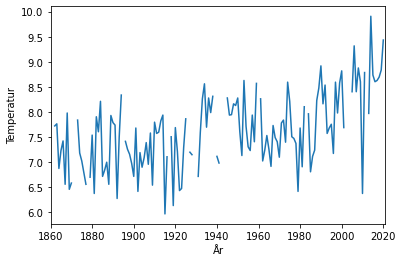

In [23]:
plt.plot(tid,data)
plt.xlim([1860,2021])
plt.xlabel('År')
plt.ylabel('Temperatur')
plt.show()

### Oppgave 1 
Bruk funksjonen til å laste inn datasettet TempBergen.txt og skriv ut de to variablene data og tid. Lag også en enkel figur. 

### Funksjon #2

Vi kan gjøre denne funksjonen litt enklere å bruke ved å utelukke `filetype` som input. Da må funksjonen selv sjekke om den trenger å inkludere `delimeter` og `skip_header`. Funksjonen trenger da et kriterie den kan sjekke som forteller den om det er en månedlig eller årlig fil den skal lese inn. Dette kan (som alt annet) sannsynligvis gjøres på mange ulige måter, men et sted å starte for å finne et passende kriterie er å se hva som skjer hvis vi prøver å laste inn et årlig datasett *uten* `delimeter` og `skip_header`:

In [24]:
url = 'https://raw.githubusercontent.com/irendundas/EkteData/main/'+'TempBergenYearly.txt'
req = requests.get(url)
f = io.StringIO(req.text)

f.seek(0) # set cursor to the top
data=np.genfromtxt(f,dtype=float)
data

array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan])

Alt blir NaN. Dette er et fint kriterie å bruke: dersom **alt** blir nan må man laste inn på metoden for årlig data. Det er viktig å presisere at kriteriet må være at **alt** er NaN - det kan jo være at datasettet inneholder et par NaN uten at det betyr at det er lastet inn feil. 

In [8]:
# Alle verdier på disse indeksene er NaN
np.nonzero(data)

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161], dtype=int64),)

Men er **alle** indeksene i "data" NaN? 
Vi sjekker det ved å sjekke om lengden av vektoren `np.nonzero(data)` er like lang som "data"-vektoren. 

In [9]:
print(len(data))

# Under må vi ha med [0] for å kutte vekk dtype=int64 etc.
print(len(np.nonzero(data)[0]))

162
162


Vi sjekker det også med en if-løkke.

In [10]:
if len(data) == len(np.nonzero(data)[0]):
    print('Alle verdier i data er NaN')

Alle verdier i data er NaN


Vi kan nå oppdatere funsjonen vår slik at vi slipper å oppgi om det er månedlig eller årlig oppløsning på datasettet vårt!

In [25]:
def loadData(file):
    
    '''
    Denne funksjonen skal
    - Lese inn et datasett fra github mappen til Ekte Data.
    - Returnere en tidsvektor og en matrise med selve verdiene.

    Input 
    file     : Navnet på .txt-filen (ikke inkluder stien her, kun filnavnet)
    filetype : 'M' hvis datasettet har månedlig oppløsning og 'Y' hvis det har 
    årlig oppløsning.
    
    Output
    data      : En vektor eller matrise (avhengig av om datasettet som leses inn
    er årlig eller månedlige gjennomsnitt) med alle verdiene i datasettet
    tid     : Tidsvektoren til datasettet.
    
    '''
    
    # Last ned filen du vil bruke fra Ekte Data sin GitHub
    url = 'https://raw.githubusercontent.com/irendundas/EkteData/main/'+file
    req = requests.get(url)
    f = io.StringIO(req.text)
    
    # Konverter dataene til et leselig format med np.genfromtxt som vi har brukt før
    # Prøv først å laste det inn uten å opggi info om delimeter og skip_header
    f.seek(0) # set cursor to the top
    data=np.genfromtxt(f,dtype=float)
    
    # Sjekk om dette funket eller om alt ble NaN.  Dersom alt ble NaN laster vi
    # inn datasettet på nytt og inkluderer info om delimeter og skip_header
    if len(data) == len(np.nonzero(data)[0]):
        f.seek(0) # set cursor to the top
        data = np.genfromtxt(f, dtype=float, delimiter=',',skip_header=1)
        
    # Sett alle "fyll-verdier" til NaN
    data[data==-999.99]=np.nan     
    
    # Tidsvektor med desimaler
    tid=data[:,0]
    
    # Selve dataene
    data=data[:,1:]
    
    return data, tid
    

In [26]:
data,tid = loadData(file='TempBergen.txt')

In [27]:
data

array([[ nan,  1.1,  3.1, ..., 10.9,  2.8,  4.7],
       [ 0.4,  0.8,  1.9, ...,  9.3,  4. ,  4.5],
       [ 2.4,  3.3,  3.6, ...,  9.5,  5.9,  2.2],
       ...,
       [ 2.6,  5.3,  4.6, ...,  8. ,  3. ,  5. ],
       [ 5.5,  4. ,  4.7, ...,  9.9,  7.9,  5.2],
       [-0.8,  nan,  nan, ...,  nan,  nan,  nan]])

In [28]:
tid

array([1861., 1862., 1863., 1864., 1865., 1866., 1867., 1868., 1869.,
       1870., 1871., 1872., 1873., 1874., 1875., 1876., 1877., 1878.,
       1879., 1880., 1881., 1882., 1883., 1884., 1885., 1886., 1887.,
       1888., 1889., 1890., 1891., 1892., 1893., 1894., 1895., 1896.,
       1897., 1898., 1899., 1900., 1901., 1902., 1903., 1904., 1905.,
       1906., 1907., 1908., 1909., 1910., 1911., 1912., 1913., 1914.,
       1915., 1916., 1917., 1918., 1919., 1920., 1921., 1922., 1923.,
       1924., 1925., 1926., 1927., 1928., 1929., 1930., 1931., 1932.,
       1933., 1934., 1935., 1936., 1937., 1938., 1939., 1940., 1941.,
       1942., 1943., 1944., 1945., 1946., 1947., 1948., 1949., 1950.,
       1951., 1952., 1953., 1954., 1955., 1956., 1957., 1958., 1959.,
       1960., 1961., 1962., 1963., 1964., 1965., 1966., 1967., 1968.,
       1969., 1970., 1971., 1972., 1973., 1974., 1975., 1976., 1977.,
       1978., 1979., 1980., 1981., 1982., 1983., 1984., 1985., 1986.,
       1987., 1988.,

Hvordan ser figuren under ut i forhold til figuren du lagde over i oppgave 1?

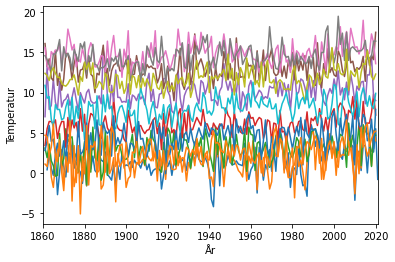

In [29]:
plt.plot(tid,data)
plt.xlim([1860,2021])
plt.xlabel('År')
plt.ylabel('Temperatur')
plt.show()

### Oppgave 2

Ta utgangspunkt i funksjon #2 men utvid den slik at den også returnerer en gjennomsnittsverdi "dataMean". For årsdatasettet skal den returnere det totale gjennomsnittet over alle årene (én verdi), mens for månedsdatasettet skal den returnere gjennomsnittet for hver måned (12 verdier)


### Behandling av output

To ting om output:
- Selv om vi skriver `return data, tid`, kan vi kalle disse variablene hva vi vil når vi bruker funksjonen. Vet vi f.eks at vi laster inn et datasett over temperatur kan vi skrive `temp, tid = loadData(...)` istedet for `data, tid = loadData(...)`. Da skjønner funksjonen at `temp` er variabelnavnet på outputen `data`. 
- Vi trenger "hente ut" alle return-verdiene. Er vi kun interessert i tidsvektoren kan vi skrive `_,tid = loadData(...)`. Hvis vi ikke vet nøyaktig hva funksjonen inneholder kan vi også skrive `data = loadData()`: da kommer alle outputverdiene ut i rekkefølgen spesifisert av `return`.

### Oppgave 3

Funksjonen fra oppgave 2 gir tre output: data, tid og dataMean. 
- Skriv ut kun `data`-variabelen, men kall den `temp`. 
- Skriv ut alle variablene i en variabel som du kaller `vars`. Plukk så ut `temp`, `tid`, og `meanTemp` fra `vars`.

### Oppgave 4

I introen nevnte vi at det er lurt å lage funksjonene sine generelle. Å inkludere å ta gjennomsnittet inni `loadData` gjør den litt mindre generell. Det kan være ryddig å kun la `loadData` laste inn data, og istedet lage en ny funksjon som tar gjennomsnittet av disse dataene. 

Lag en ny funksjon som gjør to ting: 
- først skal den bruke funksjonen `loadData` til å hente inn datafilen, 
- så skal den ta gjennomsnittet på samme måte som i oppgave 2. 

Input variabelen blir `file`, og output variabelen blir kun `dataMean`.

Denne funksjonen skal altså bruke en annen funksjon inni seg, og så gi et nytt output. Et hint for å komme igang er at funksjonen `loadData` gjør jo også dette: både np.genfromtxt og np.nonzero er funksjoner som gir output som brukes videre i `loadData`.

________________

### Prosjektoppgave: Funksjon for gjennomsnitt i seksjoner

I flere av disse konsept-oppgavene er en del av oppgaven å dele tidsperioden inn i seksjoner som en måte å filtrere rådataene på. Dette kan vi lage en funksjon for slik at det gjøres automatisk. Vi tar utgangspunkt i funksjonene vi har over, og inkludere metoder for å finne indekser som deler inn datasettet i for eksempel tiårs-bolker som vi har gjort i f.eks. "for-løkke" oppgaven. 

Ting å tenke på:
- Hvilke ekstra input trengs?
- Hvilke output vil vi ha? 
- Hva skal funksjonen gjøre dersom antall år i hver bolk ikke går opp i antall år i datasettet?
- Skal den behandle "rest-årene" likt uavhengig av hvor mange det er? Hvis man f.eks. vil dele inn i tiårs-bolker - skal funksjonen gjøre det samme uavhengig av om det er 2 eller 9 restår?

### Løsnings*forslag*
Husk igjen - denne prosjektoppgaven kan løses på mange ulike måter. 

For eksempel kan man tenke litt mer som i oppgave 4 og lage flere små funksjoner som brukes inni hovedfunkjsonen for å oppnå det endelige resultatet. Dette kan gjøre koden ryddigere og penere, som ofte gjør det mer oversiktlig.

Denne funksjonen skal
- lese inn et datasett fra github mappen til Ekte Data
- dele datasettet inn i bolker med lengde angitt av dT (antall år)
- kunne håndtere både datasettene med års- og måneds-gjennomsnitt
- putte "rest år" i en siste bolk dersom lengden ikke går opp med dT, og skrive ut en beskjed om hvilke år som er i denne bolken (dersom aktuelt). Dersom det er færre enn dT/2 restår - legg dem til den siste bolken, dersom det er dT/2 eller flere restår - lag en ny liten bolk. 

In [30]:
def array_mean(
    file,dT, 
    filepath='https://raw.githubusercontent.com/irendundas/EkteData/main/'
):
    
    '''
    Denne funksjonen skal
    - lese inn et datasett fra github mappen til Ekte Data.
    - dele datasettet inn i bolker med lengde angitt av dT (antall år).
    - kunne håndtere både datasettene med års- og måneds-gjennomsnitt.
    - putte "rest år" i en siste bolk dersom lengden ikke går opp med dT, 
      og skrive ut en beskjed om hvilke år som er i denne bolken (dersom 
      aktuelt).
    - jeg vil gjerne at den skal kunne sjekke om den trenger å ta vekk header 
      osv selv, men per nå må man ha input på det.
    
    Input 
    file     : the name of the txt-file, not including the path, which is 
    constant and set below. 
    dT       : the timestep, i.e., the number of years to average across. 
    
    Output
    meanVal  : gjennomsnittsverdier i bolker med lengde bestemt av dT.
    time     : en tidsvektor med midtpunktene av hver tidsbolk.
    
    '''
    # Last ned filen du vil bruke fra Ekte Data sin GitHub
    url = 'https://raw.githubusercontent.com/irendundas/EkteData/main/'+file
    req = requests.get(url)
    f = io.StringIO(req.text)
    
    # Konverter dataene til et leselig format med np.genfromtxt som vi har brukt før
    # Prøv først å laste det inn uten å opggi info om delimeter og skip_header
    f.seek(0) # set cursor to the top
    data=np.genfromtxt(f,dtype=float)
    
    # Sjekk om dette funket eller om alt ble NaN.  Dersom alt ble NaN laster vi
    # inn datasettet på nytt og inkluderer info om delimeter og skip_header
    if len(data) == len(np.nonzero(data)[0]):
        f.seek(0) # set cursor to the top
        data = np.genfromtxt(f, dtype=float, delimiter=',',skip_header=1)
        
        
        
    data[data==-999.99]=np.nan
    T=len(data) # Antall år i datasettet
    
    start=0 # startindeks
    stop=T  # stopindeks
    
    # Start- og slutt-indeks til hver av "dT"-års-bolkene
    ind=np.arange(start,stop,dT) 
    
    
    # I tilegg til å returnere gjennomsnittsverdiene vil vi ha en vektor med 
    # tid. Dette gir midtpunktene i hver bolk med desimaler.
    time=np.arange(data[0,0]+dT/2,2021,10)
    

    # In this case dT doesn't add up into T, and some years will be left out. 
    # We want to take the mean over these as well, and include them at the end 
    # of the averaged time series. 
    if T-ind[-1] > 0: 
        rest=T-ind[-1] # nr of years left out
        if rest < dT/2:
            ind[-1]=T
            print((
                f'Dividing the datset into sections of length {dT} leaves out '
                f'{rest} year(s) at the end of the time series. The last ' 
                f'element in the output is the average of these/this {rest} '
                f'year(s) combined with the last full period.'
            ))
        elif rest >= dT/2:
            ind=np.append(ind,len(data)) 
            # Må få med en ekstra tidsperiode i de tilfellene hvor jeg legger 
            # til en ekstra bolk
            time=np.append(time,time[-1]+rest/2)
            print((
                f'Dividing the datset into sections of length {dT} leaves out '
                f'{rest} year(s) at the end of the time series. The last '
                f'element in the output is the average of these/this {rest} '
                f'year(s).'
            ))
    
    
    # dT-bolker x 1 eller 12 avhengig av om det skal bli års- eller månedssnitt
    meanVal=np.zeros((len(ind)-1,data.shape[1]-1)) 
    
    if data.shape[1]==2:
        for i in range(len(ind)-1): 
            # for e.g., i=0 blir dette data[ind[0]:ind[1],1]=data[0:dT,1]
            meanVal[i]=np.nanmean(data[int(ind[i]):int(ind[i+1]),1]) 
            
    elif data.shape[1]==13:
        for mo in range(12): # iterer gjennom månedene
            for i in range(len(ind)-1): # iterer gjennom dT-årsperiodene
                # vi begynner på "data" sin kolonne mo+1 fordi første kolonne i
                # "data" er årstallene 
                meanVal[i,mo]=np.nanmean(data[int(ind[i]):int(ind[i+1]),mo+1]) 
                
    # vi vil også gi ut en tidsvektor i heltall avrundet fra "time"-vektoren   
    #time=np.arange(start+dT/2,stop-dT/2,dT)
    meanTime = np.round(np.nextafter(time, time+1))
    #timeid = timeid.astype(int)
    #meanTime=data[timeid,0]
    
    return meanVal, time, meanTime

In [31]:
array_mean(file='TempBergenYearly.txt',dT=13)

Dividing the datset into sections of length 13 leaves out 5 year(s) at the end of the time series. The last element in the output is the average of these/this 5 year(s) combined with the last full period.


(array([[7.23666667],
        [7.11388889],
        [7.32083333],
        [7.18012821],
        [7.1125    ],
        [7.77      ],
        [7.85916667],
        [7.65972222],
        [7.58653846],
        [7.59722222],
        [8.10208333],
        [8.63555556]]),
 array([1867.5, 1877.5, 1887.5, 1897.5, 1907.5, 1917.5, 1927.5, 1937.5,
        1947.5, 1957.5, 1967.5, 1977.5, 1987.5, 1997.5, 2007.5, 2017.5]),
 array([1868., 1878., 1888., 1898., 1908., 1918., 1928., 1938., 1948.,
        1958., 1968., 1978., 1988., 1998., 2008., 2018.]))